In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix,classification_report


In [3]:
mnist = fetch_openml('mnist_784',version=1)



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
x,y = mnist.data,mnist.target.astype(int)
x = x/255
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
mlp = MLPClassifier(hidden_layer_sizes = (100,50))

mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 50))

In [10]:
pred = mlp.predict(x_test)
conf_matrix = confusion_matrix(pred,y_test)
print(classification_report(pred,y_test))



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1341
           1       0.99      0.99      0.99      1596
           2       0.97      0.97      0.97      1382
           3       0.97      0.98      0.98      1421
           4       0.97      0.98      0.98      1288
           5       0.98      0.97      0.98      1285
           6       0.99      0.98      0.99      1413
           7       0.97      0.98      0.98      1483
           8       0.97      0.97      0.97      1360
           9       0.97      0.97      0.97      1431

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



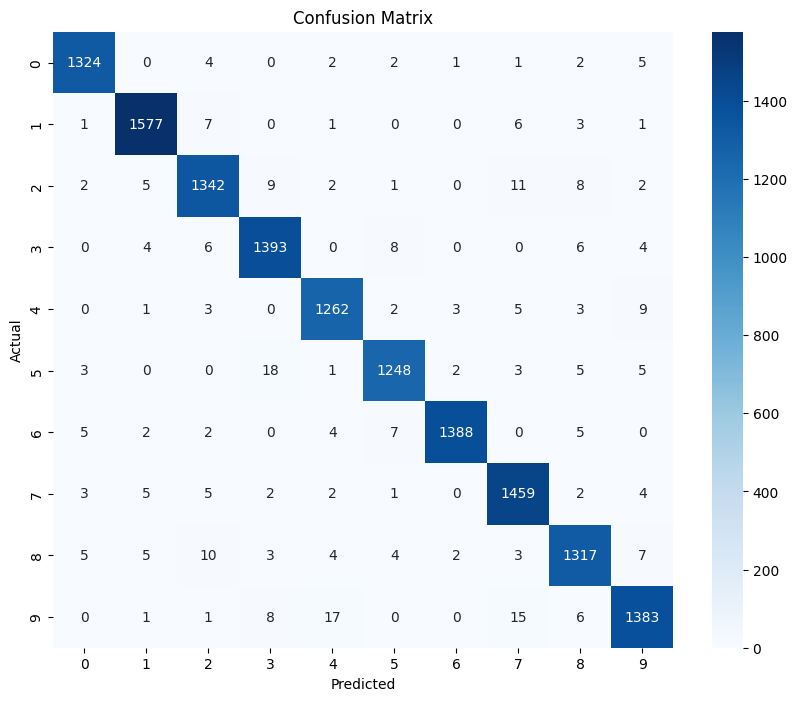

In [16]:
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
